In [1]:
#Import libraries such as pandas matplotlib and seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

## Description of data
For this report, we decided to use two databases: a quantitative database from **https://covid.ourworldindata.org** and a qualitative database from a survey on **https://data.humdata.org**. This analysis will be done on two countries: $ Ghana $ and $ Rwanda $ . We have extracted from the two global databases the parameters measured for these two countries. 

#### _Dataset n°1_

In [2]:
data1 = pd.read_excel("https://covid.ourworldindata.org/data/owid-covid-data.xlsx", 
                    parse_dates=['date'])

In [195]:
data1.head(3)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [196]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  13907 non-null  object        
 1   location                  14092 non-null  object        
 2   date                      14092 non-null  datetime64[ns]
 3   total_cases               14092 non-null  int64         
 4   new_cases                 14092 non-null  int64         
 5   total_deaths              14092 non-null  int64         
 6   new_deaths                14092 non-null  int64         
 7   total_cases_per_million   13804 non-null  float64       
 8   new_cases_per_million     13804 non-null  float64       
 9   total_deaths_per_million  13804 non-null  float64       
 10  new_deaths_per_million    13804 non-null  float64       
 11  total_tests               3462 non-null   float64       
 12  new_tests         

**The database (data1) provides a trend in the number of infections, number of deaths, etc. from different countries. The database contains 13883 lines and 16 variables.**


#### _Dataset n°2_

In [3]:
data2 = pd.read_excel("https://data.humdata.org/dataset/24144abc-c60c-4bdd-b123-2bb08f184765/resource/ab241169-4467-4a89-8e85-e9384ad22c52/download/geopoll-coronavirus-round2-data.xlsx", 
                      header=2, parse_dates=['Survey Date'])


In [198]:
data2.head(3)

,Survey Date,Country,Admin1,BirthYear,Gender,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,...,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
0,2020-04-02,Kenya,Machakos,1999,Male,Yes,Rural area,Corona,5,Contracting the disease,...,False,True,False,False,False,False,False,NaN,Consuming more,Nothing
1,2020-04-02,Kenya,Uasin Gishu,1991,Male,Yes,Urban area,High prices of goods,5,Local infections,...,False,True,False,False,False,True,True,Media outlets,Consuming more,Hope
2,2020-04-02,Nigeria,Benue,1999,Male,Yes,Urban area,Light,5,Contracting the disease,...,False,False,False,False,False,True,False,Health organizations,Consuming more,Will go back to school soon


In [ ]:
data2.info()

**The database (data2) examine perceptions and the impact of COVID-19 in 12 countries throughout sub-Saharan Africa. 
Topics covered include greatest concerns surrounding coronavirus, preventative measures being taken, 
changes in food market operability and food security, etc.
The database contains 4788 lines and 55 variables.**

## A- Trend analysis of the disease in the two countries

### Question
**1**. What is the progression of the disease (in terms of mortality and number of infected persons) in these two countries?

In [4]:
df1 = data1[(data1.location.isin(["Ghana", "Rwanda"]))]

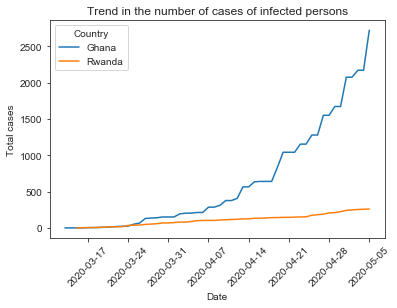

In [5]:
fig1= sns.lineplot(x='date', y='total_cases', 
                   hue='location', data=df1, legend = False)
fig1.set(xlabel="Date", ylabel="Total cases", 
         title="Trend in the number of cases of infected persons")
plt.xticks(rotation=45)
plt.legend(title="Country", loc='upper left', labels=['Ghana', 'Rwanda'])
plt.show()

In [6]:
print('Totat of infected persons in Rwanda:',df1[df1.location == 'Rwanda'].total_cases.max())
print('To now, almost {} people have been infected in Ghana'.format(df1[df1.location == 'Ghana'].total_cases.max()))

Totat of infected persons in Rwanda: 261
To now, almost 2719 people have been infected in Ghana


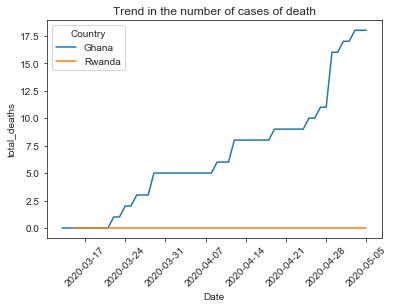

In [7]:
fig2= sns.lineplot(x='date', y='total_deaths',
                   hue='location', data=df1, legend = False)
fig2.set(xlabel="Date", ylabel="total_deaths",
         title="Trend in the number of cases of death")
plt.xticks(rotation=45)
plt.legend(title="Country", loc='upper left', labels=['Ghana', 'Rwanda'])
plt.show()

In [8]:
print('Totat of death in Rwanda:',df1[df1.location == 'Rwanda'].total_deaths.max())
print('To now, almost {} people dead in Ghana'.format(df1[df1.location == 'Ghana'].total_deaths.max()))

Totat of death in Rwanda: 0
To now, almost 18 people dead in Ghana


### Discussion
The results show a net evolution of the contamination of the disease in Ghana than in Rwanda. After more than a month, Ghana has registered nearly 2719 infected persons with 18 deaths while Rwanda remains at 0 with nearly 261 cases of infections. We can conclude that the virus evolves more rapidly in Ghana than in Rwanda. 

## B- Perceptions and the impact of COVID-19 

### Question
**2**. What is their level of involvement and **3**. knowledge of the risk of this virus in these countries? 
The degree of their involvement was measured from 1 (less concerned) to 5 (very concerned).

In [9]:
df2=data2[(data2.Country.isin(["Ghana", "Rwanda"]))]

[Text(0,0.5,''), Text(0.5,0,'Risk Awareness')]

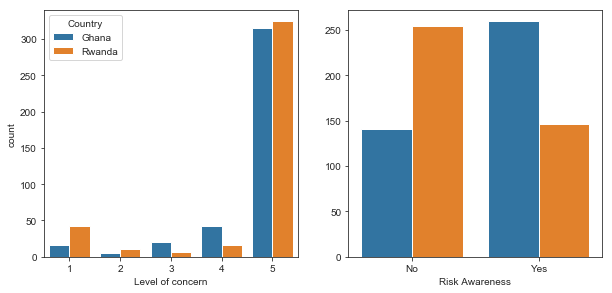

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
q2 = sns.countplot(x="LevelConcern", data=df2, hue="Country")
q2.set(xlabel="Level of concern")

plt.subplot(2,2,2)
q3 = sns.countplot(x="RiskAwareness", data=df2, hue="Country")
q3.legend_.remove()
q3.set(ylabel='', xlabel="Risk Awareness")

In [11]:
print(df2.groupby('Country')["LevelConcern"].value_counts())
print(df2.groupby('Country')["RiskAwareness"].value_counts())

Country  LevelConcern
Ghana    5               315
         4                43
         3                21
         1                16
         2                 5
Rwanda   5               324
         1                43
         4                16
         2                11
         3                 6
Name: LevelConcern, dtype: int64
Country  RiskAwareness
Ghana    Yes              259
         No               141
Rwanda   No               254
         Yes              146
Name: RiskAwareness, dtype: int64


### Discussion
Both countries have an estimated average of more than 300 people claiming to be affected by the presence of the virus. While in general both countries show the same trend, the number of people in Rwanda who say they are not concerned about the virus is higher than in Ghana. However, against all expectations, 254 people in Rwanda say they do not know the risks involved, compared to 141 people in Ghana. It appears that for this study, 65% of the population in Ghana (against 35%  in Rwanda) are aware of the dangerousness of the contrary illness.


### Question
 **4**.The majority of people living either in the informal sector or in daily work, what is their perception of the impact (measured on a scale of 1 to 5) of the virus on the economy of their country.

Text(0.5,1,'Impact of the virus on the economie')

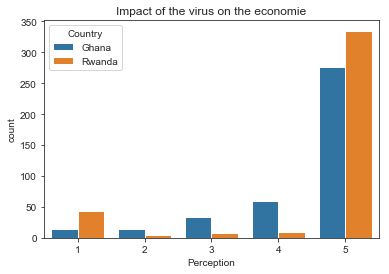

In [12]:
sns.countplot(x="EconomicImpact", data=df2, hue="Country")
plt.xlabel("Perception")
plt.title("Impact of the virus on the economie")

In [13]:
print(df2.groupby('Country')["EconomicImpact"].value_counts())

Country  EconomicImpact
Ghana    5                 277
         4                  60
         3                  33
         1                  15
         2                  15
Rwanda   5                 335
         1                  44
         4                  10
         3                   7
         2                   4
Name: EconomicImpact, dtype: int64


### Discussion
Respectively 277 people in Ghana and 335 people in Rwanda said that the impact of the virus on their country's economy is very high. Beyond this analysis, it is important to note that the Ghanaians (perception levels (2 to 4)) perceive more the probably very negative effects of the virus on the aconomy of their country.

## Conclusion
The perception of the population of the virus in terms of health or economic impact seems to be practically the same in both countries. However, these data do not allow us to make a decision on the factors that have influenced the number of cases and mortality observed in the database (Dataset n°1). 

[Text(0,0.5,''), Text(0.5,0,'Risk Awareness')]

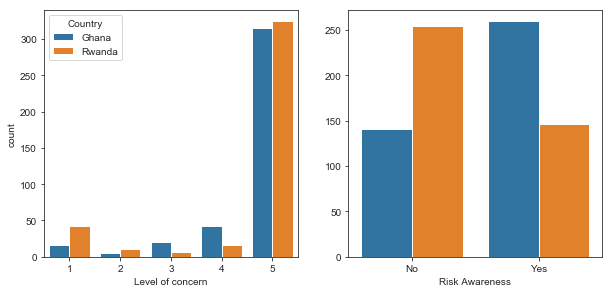

In [207]:
print(df2.groupby('Country')["LevelConcern"].value_counts())
print(df2.groupby('Country')["RiskAwareness"].value_counts())

Country  LevelConcern
Ghana    5               315
         4                43
         3                21
         1                16
         2                 5
Rwanda   5               324
         1                43
         4                16
         2                11
         3                 6
Name: LevelConcern, dtype: int64
Country  RiskAwareness
Ghana    Yes              259
         No               141
Rwanda   No               254
         Yes              146
Name: RiskAwareness, dtype: int64


### Discussion
Both countries have an estimated average of more than 300 people claiming to be affected by the presence of the virus. While in general both countries show the same trend, the number of people in Rwanda who say they are not concerned about the virus is higher than in Ghana. However, against all expectations, 254 people in Rwanda say they do not know the risks involved, compared to 141 people in Ghana. It appears that for this study, 65% of the population in Ghana (against 35%  in Rwanda) are aware of the dangerousness of the contrary illness.


### Question
 **4**.The majority of people living either in the informal sector or in daily work, what is their perception of the impact (measured on a scale of 1 to 5) of the virus on the economy of their country.

Text(0.5,1,'Impact of the virus on the economie')

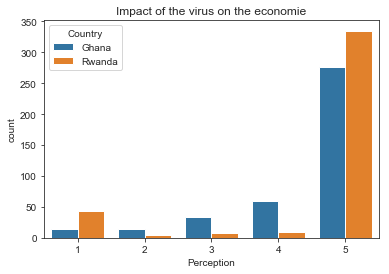

In [208]:
sns.countplot(x="EconomicImpact", data=df2, hue="Country")
plt.xlabel("Perception")
plt.title("Impact of the virus on the economie")

In [209]:
print(df2.groupby('Country')["EconomicImpact"].value_counts())

Country  EconomicImpact
Ghana    5                 277
         4                  60
         3                  33
         1                  15
         2                  15
Rwanda   5                 335
         1                  44
         4                  10
         3                   7
         2                   4
Name: EconomicImpact, dtype: int64


### Discussion
Respectively 277 people in Ghana and 335 people in Rwanda said that the impact of the virus on their country's economy is very high. Beyond this analysis, it is important to note that the Ghanaians (perception levels (2 to 4)) perceive more the probably very negative effects of the virus on the aconomy of their country.

## Conclusion
The perception of the population of the virus in terms of health or economic impact seems to be practically the same in both countries. However, these data do not allow us to make a decision on the factors that have influenced the number of cases and mortality observed in the database (Dataset n°1). 